In [3]:
import gym.spaces
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

env = gym.make('FrozenLake-v0')

gama = 0.5
epsilon = 0.1
alpha = 0.1

nrEpisodes = 10000

## ACTIONS
nrActions = 4
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

## STATES
nrStates = 4*4

## Random initialization
Q = np.zeros((nrStates,nrActions))

def printPolicy(pi):
    arrows = ["\t←\t", "\t↓\t", "\t→\t", "\t↑\t"]
    size = int(np.sqrt(len(pi)))
    for i in range(size):
        row = "|"
        for j in range(size):
            row += arrows[Pi[i*size+j]] + "|"
        print(row)

Q:
[[  7.02275974e-05   6.71992487e-05   8.24786284e-05   4.11192059e-05]
 [  4.82849582e-05   1.26818399e-04   9.28356240e-05   9.14352522e-05]
 [  1.31341359e-03   4.93802422e-04   1.21805624e-03   1.13683729e-04]
 [  9.62593188e-05   4.46857726e-05   2.26121365e-05   1.60694988e-04]
 [  3.13178453e-04   2.99756570e-04   1.91400169e-04   6.35845232e-05]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  8.01060990e-03   1.57035337e-02   4.87617623e-03   1.45315624e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.95125758e-04   1.90826186e-03   1.39411121e-03   1.28725946e-03]
 [  6.37564211e-03   1.10151681e-02   1.45282342e-02   9.10150079e-03]
 [  4.57779934e-02   8.89103372e-02   2.04127208e-02   3.00336618e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.15999042e-02   3.75351707e-02   4.21208745e-02   4.18334178e-02]
 [ 

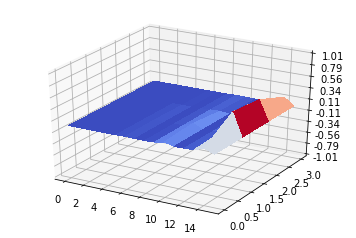

V:
[8.0756382589549096e-05, 0.00012312091505873191, 0.0012605461269533319, 0.00015273179461011054, 0.00030355860039937404, 0.0, 0.014851571197037713, 0.0, 0.0018370546355639496, 0.014100924373421364, 0.083971913885008936, 0.0, 0.0, 0.041236021240419037, 0.43184248596284774, 0.0]


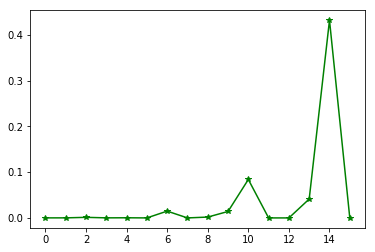

Policy:
[2, 1, 0, 3, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 1, 0]
|	→	|	↓	|	←	|	↑	|
|	←	|	←	|	↓	|	←	|
|	↓	|	→	|	↓	|	←	|
|	←	|	→	|	↓	|	←	|
Episode avg. length:  7.6845


In [4]:
def egreedyAction(s):
    return np.argmax(Q[s,:]) if np.random.rand(0,1)>epsilon else env.action_space.sample()
 
def V(s):
    return (1-epsilon) * np.max(Q[s,:]) + epsilon * np.mean(Q[s,:])

episodeAccumLen = 0
for e in range(nrEpisodes):
    env.reset()
    #env.render()
    s = 0
    a = egreedyAction(s)
    terminated = False
    while not terminated:
        nextS, R, terminated, debug_info = env.step(a)
        #env.render()
        nextA = egreedyAction(nextS)
        Q[s,a] = Q[s,a] + alpha * (R + gama * Q[nextS, nextA] - Q[s,a])
        s = nextS
        a = nextA
        episodeAccumLen += 1
    #env.render()
    #print("End of episode")

V = [V(s) for s in range(nrStates)]
Pi = [np.argmax(Q[s,:]) for s in range(nrStates)]

print("Q:")
print(Q)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.

X = [i for i in range(nrStates)]
Y = [i for i in range(nrActions)]
X, Y = np.meshgrid(X, Y)
Z = Q[X,Y]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


plt.show()


print("V:")
print(V)

figure()
plot([i for i in range(nrStates)], V, 'g*-')
show()

print("Policy:")
print(Pi)
printPolicy(Pi)
            
print("Episode avg. length: ", episodeAccumLen/nrEpisodes)

        